# Homework 2 CSCI 4364/6364 Machine Learning

##**Adventures in Linear Regression**
v.20240901a

**Due Date: 9/19/2024, 23:59 ET**

---

**Purpose:**
This homework will familiarize you with linear regression using the [Prostate Cancer dataset](https://hastie.su.domains/ElemStatLearn/data.html). First, you’ll work with the least squares. Then you’ll investigate regression using L2 (Ridge) and L1 (Lasso) regularization. Finally, you will implement an iterative version of L2 Regularization using gradient descent.

**Note**: Besides part 3, you should implement your solution with the fundamental equations we discussed in class and in Hastie, chapter 3. *Only in part 3, you should use Scikit-Learn*.



---
**Submission Instructions:**
This assignment will be done entirely in this Colaboratory notebook, and you will submit your notebook via GWU blackboard. Please embed your code in code blocks and add in comments into the text blocks.

**Important:** Please submit your assignment with outputs, by navigating to Edit >> Notebook Settings and ensuring *Omit code cell output when saving this notebook* is **NOT** selected.

---

**Grading on the notebook:**

Parts 1 - 4 of this notebook are worth 5% of the semester grade, where 3% is completion and full functionality, and 2% is based on comments and descriptions, and well-written and commented Python code, based on the coding standards. The notebook should be fully explained and work in its entirety when you submit it.

**Extra Credit!** Besides being a great learning experience about convex optimization, part 5 is **optional**, but worth up to 2% of the semester grade.

**Coding Standards:**
Throughout this course, we will use Google’s Python Style Guide (https://google.github.io/styleguide/pyguide.html) as the coding standard for homework and project submission. A big part of machine learning in industry is applying good programming practices.


**Name:** Vidhi khandelwal

**GW ID:** G30891152

In [ ]:
#@title Imports
##########################################################
# Always include all imports at the first executable cell.
##########################################################
from abc import ABC, abstractmethod # Abstract Base Classes for Python
import pandas as pd # Pandas dataframe libaries
import numpy as np # Numpy numerical computation library
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn import metrics # Used to compute metrics, such as the Area Under the Curve (AUC)
import matplotlib.pyplot as plt # Plotting library.
from typing import List, Tuple, Mapping # Common types for Python type definitions


# Data Preperation & Feature Analysis (Prostate Cancer)



In [ ]:
#@title Load the Prostate Cancer dataset
_SEED = 1223
random_state = np.random.RandomState(_SEED)
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/prostate.csv')
# Randomize the rows
df = df.sample(frac =  1, random_state=random_state)

In [ ]:
#@title Split into training and test set
# Following Hastie p.50, we create a training set of 67
split_index = 67
df_train = df.iloc[:split_index]
df_test = df.iloc[split_index:]

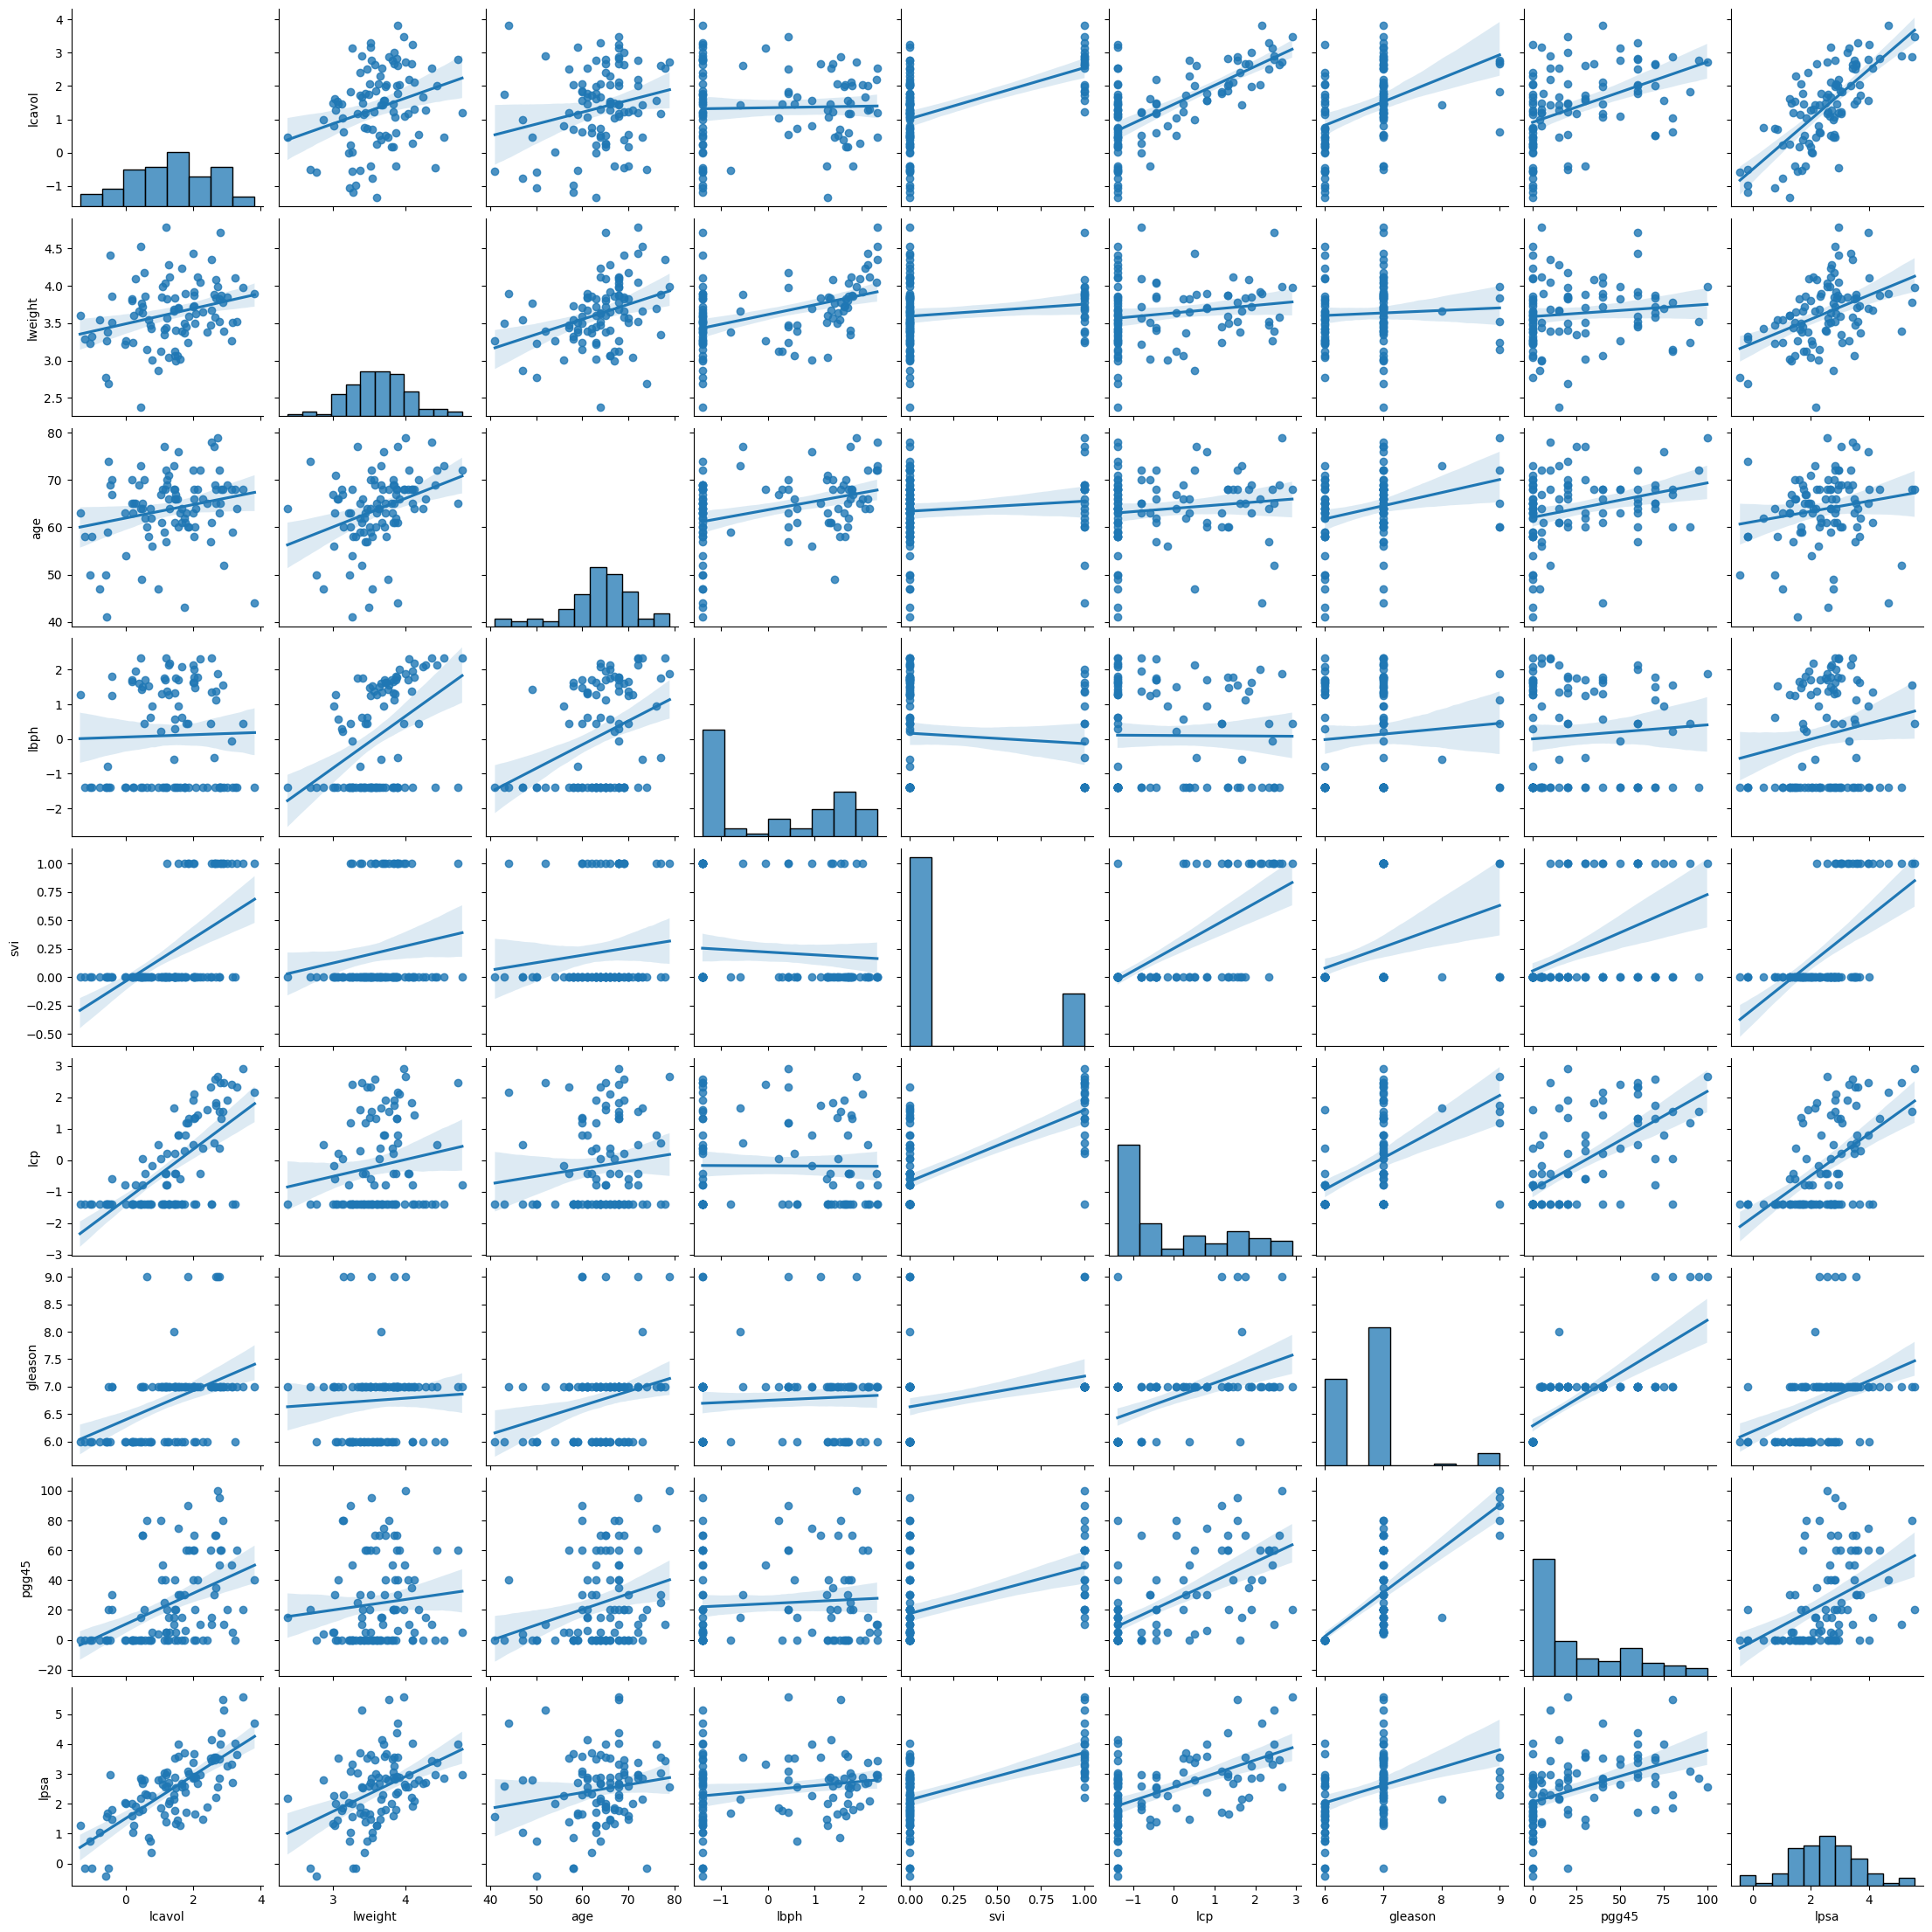

In [ ]:
#@title Display pair plots
sns.pairplot(df, kind="reg")
plt.show()

In [ ]:
#@title Split the labels and convert to numpy arrays
y_train = df_train['lpsa'].to_numpy()
X_train = df_train.copy().drop(columns = ['lpsa']).to_numpy()
y_test = df_test['lpsa'].to_numpy()
X_test = df_test.copy().drop(columns = ['lpsa']).to_numpy()

In [ ]:
class BaseLearningAlgorithm(ABC):
  """Base class for a Supervised Learning Algorithm."""

  @abstractmethod
  def train(self, X_train:np.array, y_train: np.array) -> None:
    """Trains a model from labels y and examples X."""

  @abstractmethod
  def predict(self, X_test: np.array) -> np.array:
    """Predicts on an unlabeled sample, X."""

  @property
  @abstractmethod
  def name(self) -> str:
    """Returns the name of the algorithm."""

# 1. Linear Regression with Least Squares
Implement a class called `BasicLeastSquaresRegression` that extends `BaseLearningAlgorithm` with “vanilla” least squares regression described in Hastie 3.2. Compute the $\boldsymbol{\beta}$ coefficient vector and solve for $\hat{y} $ and compute the performance result as the mean squared error on the test set. Use only numpy for your solution.





In [ ]:

# Extending the BaseLearningAlgorithm class
class BasicLeastSquaresRegression(BaseLearningAlgorithm):
    def __init__(self):
        # Initialize the coefficient vector (β) as None
        self.beta = None

    # Implementing the train method to compute β (the coefficient vector)
    def train(self, X_train: np.array, y_train: np.array) -> None:
        # Adding a column of ones to X_train for the intercept term
        X_train = np.c_[np.ones(X_train.shape[0]), X_train]  # Augmenting with ones for bias term
        # beta = (X^T * X)^-1 * X^T * y (the closed-form solution for least squares)
        self.beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

    # Implementing the predict method to compute y^ (the predicted values)
    def predict(self, X_test: np.array) -> np.array:
        # Adding a column of ones to X_test for the intercept term
        X_test = np.c_[np.ones(X_test.shape[0]), X_test]
        # Predicting y^ using the computed β
        return X_test @ self.beta

    # Implementing the name property to return the algorithm's name
    @property
    def name(self) -> str:
        return "Basic Least Squares Regression"

    # Method to compute the performance (mean squared error)
    def mean_squared_error(self, y_true: np.array, y_pred: np.array) -> float:
        return np.mean((y_true - y_pred) ** 2)

    def important_feature(self, features: list) -> str:
          """Returns the most important feature based on the coefficient magnitude."""
          # Exclude the intercept (bias) term from the coefficients
          feature_coeffs = self.beta[1:]
          # Find the index of the largest absolute coefficient
          important_idx = np.argmax(np.abs(feature_coeffs))
          # Return the corresponding feature name
          return features[important_idx]


    def print_weights(self) -> None:
        """
        Prints the weights (including intercept) ranked in descending order by the absolute value of the weights.
        """
        weights = self.beta[1:]  # Exclude the intercept for ranking
        sorted_indices = np.argsort(-np.abs(weights))  # Sort indices by absolute value in descending order

        print("Weights ranked by absolute value (excluding intercept):")
        for i in sorted_indices:
            print(f"{features[i]}: {weights[i]}")







In [ ]:
df_train.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
64,2.073172,3.623007,64,-1.386294,0,-1.386294,6,0,2.882004
86,2.024193,3.731699,58,1.638997,0,-1.386294,6,0,3.680091
6,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468
78,2.648300,3.582129,69,-1.386294,1,2.583998,7,70,3.457893
23,1.781709,3.451574,63,0.438255,0,1.178655,7,60,1.713798


In [ ]:
model = BasicLeastSquaresRegression()
model.train(X_train, y_train)
features = ['lcavol',	'lweight',	'age',	'lbph',	'svi',	'lcp',	'gleason',	'pgg45']
most_important_feature= model.important_feature(features)
print(f"The most important feature is: {most_important_feature}")
y_pred = model.predict(X_test)
mse = model.mean_squared_error(y_test, y_pred)
print(f'MSE on test set: {mse:.3f}')
model.print_weights()


The most important feature is: lweight
MSE on test set: 0.556
Weights ranked by absolute value (excluding intercept):
lweight: 0.7508190587434692
svi: 0.7188172249476582
lcavol: 0.5723986311368542
lbph: 0.13397238037631623
lcp: -0.10572943350400929
gleason: -0.03475334327530408
age: -0.023814213539029024
pgg45: 0.010497509411892116


**Questions:**

**1.1** What MSE loss score do you get with Least Squares?

**Answer**: MSE on test set: 0.556

**1.2** What variables carry the greatest influence (i.e., are the most important) in the least squares regression?

**Answer**: The most important feature is: lweight.

**1.3** Does normalizing the data improve performance (lower MSE loss)? If so, why?

**Answer**: Yes, normalizing the data can improve performance and lower the Mean Squared Error loss by ensuring that all features contribute equally to the model even if it is large-scale feature dataset, improving the optimization process and numerical stability. Normalizing the data improves Convergence of Gradient-Based Optimization as the optimization algorithm take more uniform steps across all dimensions, speeding up convergence and lowering the final MSE.

# 2. Linear Regression with L2 Regularization (Ridge)

Using the closed-form solution to Ridge Regression, implement a class called `RidgeRegression` that extends `BaseLearningAlgorithm` based on Hastie 3.41. Iterate through the regression penalty term, $\lambda$, and plot (a) MSE loss as a function of $\lambda$, and (b) each coefficient weight as a function of $\lambda$. Use only numpy and matplotlib for your solution.


Lowest MSE: 0.548 at lambda = 3.511
Ridge coefficients (at best lambda): [ 0.56479283  0.56028726 -0.01901153  0.14697674  0.45150742 -0.02909104
 -0.06025309  0.01028315]


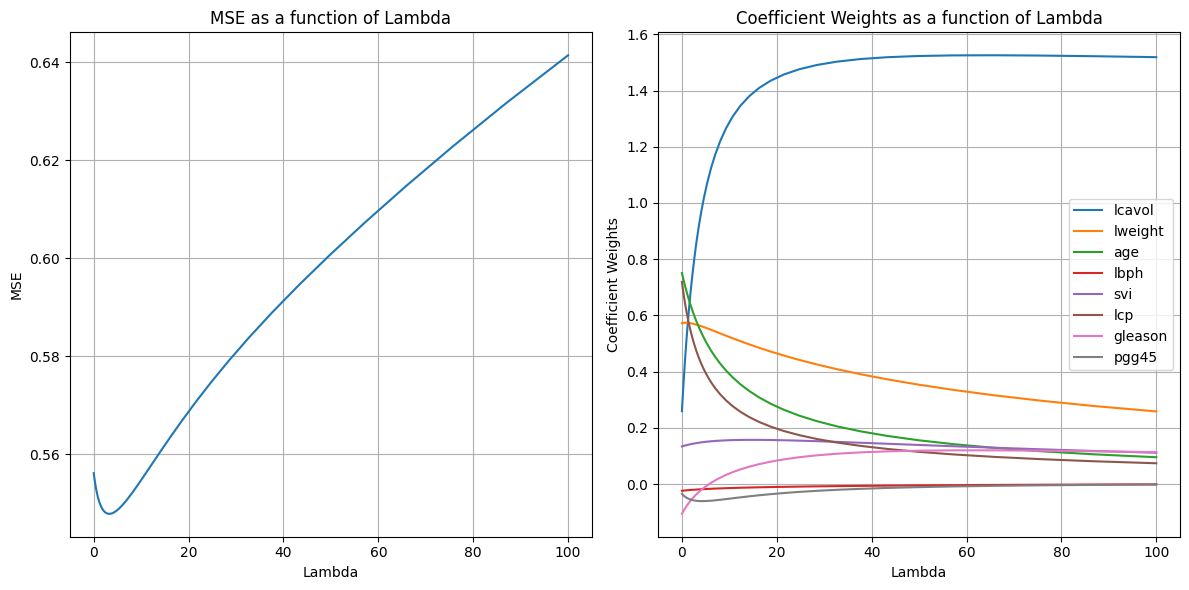

In [ ]:


# Ridge Regression class extending the BaseLearningAlgorithm
class RidgeRegression(BaseLearningAlgorithm):
    def __init__(self, lam: float = 1.0):
        self.lam = lam  # Regularization parameter (lambda)
        self.beta = None  # Coefficients

    # Training the Ridge Regression model using the closed-form solution
    def train(self, X_train: np.array, y_train: np.array) -> None:
        X_train = np.c_[np.ones(X_train.shape[0]), X_train]  # Augment with ones for intercept term
        n, m = X_train.shape
        identity_matrix = np.eye(m)
        identity_matrix[0, 0] = 0  # Don't regularize the intercept term
        # Closed-form solution: β = (X^T X + λI)^-1 X^T y
        self.beta = np.linalg.inv(X_train.T @ X_train + self.lam * identity_matrix) @ X_train.T @ y_train

    # Predict using the learned β
    def predict(self, X_test: np.array) -> np.array:
        X_test = np.c_[np.ones(X_test.shape[0]), X_test]
        return X_test @ self.beta

    # Property to return the algorithm name
    @property
    def name(self) -> str:
        return "Ridge Regression"

    # Method to calculate MSE
    def mean_squared_error(self, y_true: np.array, y_pred: np.array) -> float:
        return np.mean((y_true - y_pred) ** 2)



# Function to iterate through lambda values and plot MSE and coefficient weights
def ridge_regression_experiment(X_train, y_train, X_test, y_test, lambdas):
    mse_values = []
    coeffs = []
    min_mse = float('inf')
    best_lambda = None
    best_coeffs = None

    for lam in lambdas:
        model = RidgeRegression(lam=lam)
        model.train(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = model.mean_squared_error(y_test, y_pred)
        mse_values.append(mse)
        coeffs.append(model.beta)
        if mse < min_mse:
              min_mse = mse
              best_lambda = lam
              best_coeffs = model.beta[1:]
    # Find the lowest MSE and corresponding lambda
    min_mse = min(mse_values)
    best_lambda = lambdas[mse_values.index(min_mse)]
    print(f'Lowest MSE: {min_mse:.3f} at lambda = {best_lambda:.3f}')

    print("Ridge coefficients (at best lambda):", best_coeffs)

    # Plot (a) MSE as a function of lambda
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(lambdas, mse_values, label='MSE')
    #plt.xscale('log')  # Log scale for λ
    plt.xlabel('Lambda')
    plt.ylabel('MSE')
    plt.title('MSE as a function of Lambda')
    plt.grid(True)




    # Convert coeffs list to a NumPy array for easy plotting
    coeffs = np.array(coeffs)

    # Plot (b) Each coefficient weight as a function of lambda
    plt.subplot(1, 2, 2)
    for i, feature in enumerate(features):
        plt.plot(lambdas, coeffs[:, i], label=feature)

    #plt.xscale('log')  # Log scale for λ
    plt.xlabel('Lambda')
    plt.ylabel('Coefficient Weights')
    plt.title('Coefficient Weights as a function of Lambda')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


features = ['lcavol',	'lweight',	'age',	'lbph',	'svi',	'lcp',	'gleason',	'pgg45']
lambdas = np.logspace(-4, 2, 100)  # Range of lambda values from 10^-4 to 10^4
ridge_regression_experiment(X_train, y_train, X_test, y_test, lambdas)



**Questions:**


**2.1** What $\lambda$ do you get the best performance (i.e., lowest MSE)?

**Answer**: Lowest MSE: 0.548 at lambda = 3.511


**2.2** Compare the results from part 1, when $\lambda = 0$. Why are the results similar or different?

**Answer**: The result is slightly different and improved because the regularization term lamba helps control the complexity of the model by shrinking the coefficients, which can prevent overfitting. In our case where lambda =3.352, the model adds a small regularization effect. This ensures that the model is slightly constrained, preventing the coefficients from becoming too large, especially in cases where the features might be highly correlated or when the dataset is noisy.
In our case, lambda = 3.352 provides a balance between minimizing the MSE and reducing the model complexity. As a result, the model achieves a slightly lower MSE compared to λ = 0, where no regularization is applied.


**2.3** Compare the weights with the weights from part 1? If you were to rank descending by the absolute value of the weights, how different is the ordering with part 1? Is the most important variable in part 1 the same as in part 2? If not, can you provide a reason?

**Answer**: Yes, lweight remains the most important variable in both Part 1 and Part 2. The relative influence of other variables like lcavol and svi shifts between the two models.


# 3. Linear Regression with L1 Regularization (Lasso)

Unlike Ridge Regression, there is no closed-form solution for Lasso, meaning there is no normal equation we can solve to immediately get all of our ideal model parameters. While it can be solved by minimizing one coordinate a time using a technique called [Coordinate Descent](http://www.adeveloperdiary.com/data-science/machine-learning/introduction-to-coordinate-descent-using-least-squares-regression/), here you can implement your solution using Scikit-Learn Lasso inside a class called `LassoRegression` which also extends `BaseLearningAlgorithm`. Like part 2, iterate through the regression penalty term, $\alpha$ , and plot (a) MSE loss as a function of $\alpha$, and (b) each coefficient weight as a function of $\alpha$.

**Note**: here we swap notation a little, replacing $\lambda$ with $\alpha$ to fit with the Scikit-Learn convention.




Lowest MSE: 0.536 at alpha = 0.215
Lasso coefficients (at best alpha): [ 0.51074828  0.         -0.          0.07477657  0.          0.
 -0.          0.01060802]


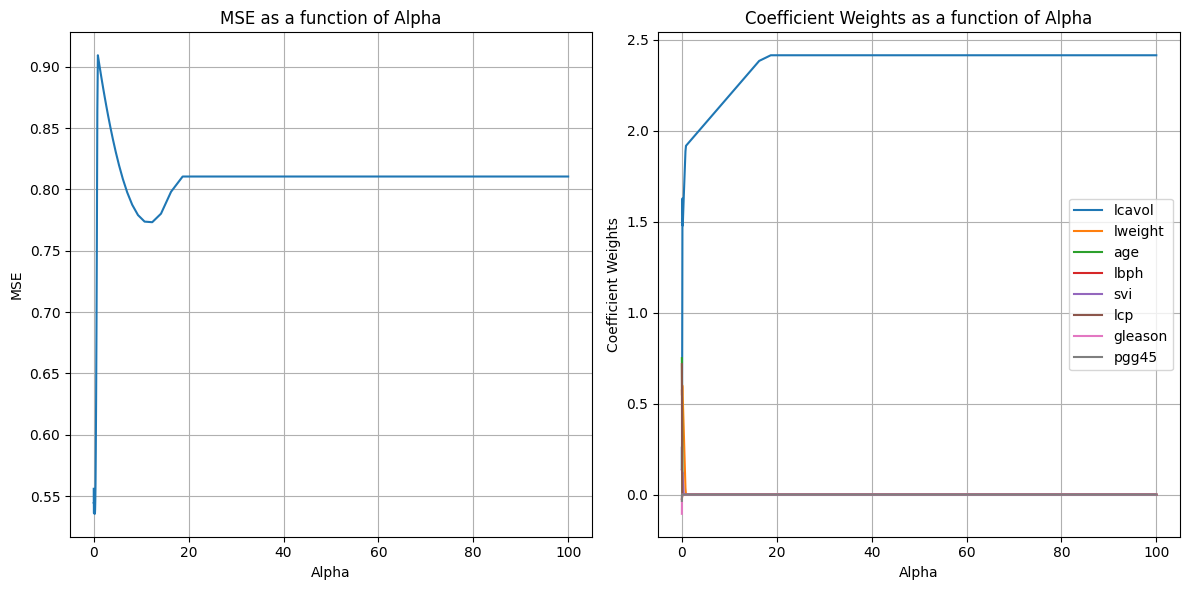

In [ ]:

# LassoRegression class extending BaseLearningAlgorithm
class LassoRegression(BaseLearningAlgorithm):
    def __init__(self, alpha: float = 1.0):
        self.alpha = alpha  # Regularization parameter (alpha)
        self.model = Lasso(alpha=self.alpha)  # Initialize Lasso model
        self.beta = None  # Coefficients

    # Train the Lasso model
    def train(self, X_train: np.array, y_train: np.array) -> None:
        self.model.fit(X_train, y_train)
        self.beta = np.concatenate(([self.model.intercept_], self.model.coef_))  # Storing the coefficients (including intercept)

    # Predict using the trained Lasso model
    def predict(self, X_test: np.array) -> np.array:
        return self.model.predict(X_test)

    # Property to return the algorithm name
    @property
    def name(self) -> str:
        return "Lasso Regression"

    # Method to calculate MSE
    def mean_squared_error(self, y_true: np.array, y_pred: np.array) -> float:
        return np.mean((y_true - y_pred) ** 2)

# Function to iterate through alpha values and plot MSE and coefficient weights
def lasso_regression_experiment(X_train, y_train, X_test, y_test, alphas):
    mse_values = []
    coeffs = []
    min_mse = float('inf')
    best_alpha = None
    best_coeffs = None

    for alpha in alphas:
        model = LassoRegression(alpha=alpha)
        model.train(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = model.mean_squared_error(y_test, y_pred)
        mse_values.append(mse)
        coeffs.append(model.beta)

        if mse < min_mse:
              min_mse = mse
              best_alpha = alpha
              best_coeffs = model.beta[1:]




    # Find the lowest MSE and corresponding alpha
    min_mse = min(mse_values)
    best_alpha = alphas[mse_values.index(min_mse)]
    print(f'Lowest MSE: {min_mse:.3f} at alpha = {best_alpha:.3f}')
    print("Lasso coefficients (at best alpha):", best_coeffs)

    # Plot (a) MSE as a function of alpha
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(alphas, mse_values, label='MSE')
    #plt.xscale('log')  # Log scale for alpha
    plt.xlabel('Alpha')
    plt.ylabel('MSE')
    plt.title('MSE as a function of Alpha')
    plt.grid(True)



    # Convert coeffs list to a NumPy array for easy plotting
    coeffs = np.array(coeffs)

    # Plot (b) Each coefficient weight as a function of alpha
    plt.subplot(1, 2, 2)
    for i, feature in enumerate(features):
        plt.plot(lambdas, coeffs[:, i], label=feature)

    #plt.xscale('log')  # Log scale for alpha
    plt.xlabel('Alpha')
    plt.ylabel('Coefficient Weights')
    plt.title('Coefficient Weights as a function of Alpha')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

features = ['lcavol',	'lweight',	'age',	'lbph',	'svi',	'lcp',	'gleason',	'pgg45']

alphas = np.logspace(-4, 2, 100)  # Range of alpha values from 10^-4 to 10^2
lambda_coeff = lasso_regression_experiment(X_train, y_train, X_test, y_test, alphas)




**Questions:**

**3.1** Under what conditions would you prefer L2 or L1 regression over vice versa? (Consider the discussion in Hastie 3.6.)

**Answer** :
1. We should prefer Ridge (L2) when features are highly correlated,
when we want to minimize prediction error and do not expect sparsity, when we want a smooth, controlled shrinkage of coefficients, and when stability in coefficient estimation is important.
2. We should prefer Lasso (L1) when feature selection is crucial, and we want a sparse model, when features are moderately correlated or uncorrelated and when we need a model that strikes a balance between Ridge and subset selection.

**3.2** Why do some coefficients become zero? Do you think this may be a method of subset selection as described in Hastie 3.3?

**Answer** : Coefficients become zero in Lasso regression due to the L1 regularization, which favors a sparse solution by shrinking some coefficients to zero. This behavior allows Lasso to perform automatic feature selection.
Lasso can be seen as a form of subset selection, as it automatically selects a subset of important features while eliminating irrelevant ones by setting their coefficients to zero. This is a continuous, smooth version of subset selection compared to traditional methods like best subset regression.

**3.3** Which method performs better (i.e., has the lower MSE)?

**Answer** : Lowest MSE: 0.536 at alpha = 0.215 for L1 performs better than L2 with Lowest MSE: 0.548 at lambda = 3.511

**3.4** Comparing the relative ranking of the weights at the lowest MSE, do Ridge Regression and Lasso Regression “agree” on the most important weights?

**Answer** :  Ridge Regression keeps all features and balances the coefficients, with lweight, lcavol, and svi being the most important.
Lasso Regression is more aggressive in feature selection, reducing many coefficients to zero and leaving only lcavol, lbph, and pgg45 as contributing factors.
Ridge Regression tends to shrink weights more smoothly because it penalizes large weights but does not eliminate them entirely.
Lasso Regression set some weights exactly to zero, as it performs both regularization and feature selection.

**3.5** In your own words, define **bias** and **variance**. Describe how bias and variance affected the results of parts 1, 2, and 3.

**Answer** : In order to make the target function easier to learn, the model made certain assumptions, which led to an inaccuracy that is known as bias.
The model's sensitivity to minute variations in the training set of data is referred to as variance.
Bias and variance affected the results of parts 1, 2, and 3 in the following ways:
1. Least Square generated a model with low training error in part 1, but high variance could have led to increased test error. The model might not function well on fresh data since it would be sensitive to the details of the training set.
2. In part 2, Ridge Regression achieved a better balance between bias and variance compared to part 1. By introducing some bias via regularization, Ridge reduced variance, resulting in a model with lower test error and better generalization to new data.
3. In part 3, Lasso resulted in a sparser model with higher bias but lower variance compared to Ridge. By selecting a subset of important features, Lasso may have performed better in scenarios where many features were irrelevant, reducing test error by preventing overfitting. However, if the data required more features to explain the target variable, Lasso's aggressive feature selection might have led to a higher bias and underfitting.

# 4.  Iterative Optimization with Gradient Descent
Implement a class called `RidgeRegressionGradDescent` that extends `BaseLearningAlgorithm` that performs linear regression with L2 regularization using [gradient descent](https://www.deeplearningbook.org/contents/numerical.html), Goodfellow 4.5. Plot both training and test MSE loss result vs. iteration.  Iterate through the regression penalty term, $\lambda$ , and plot (a) MSE loss as a function of $\lambda$, and (b) each coefficient weight as a function of $\lambda$. Use only numpy and matplotlib for your solution.


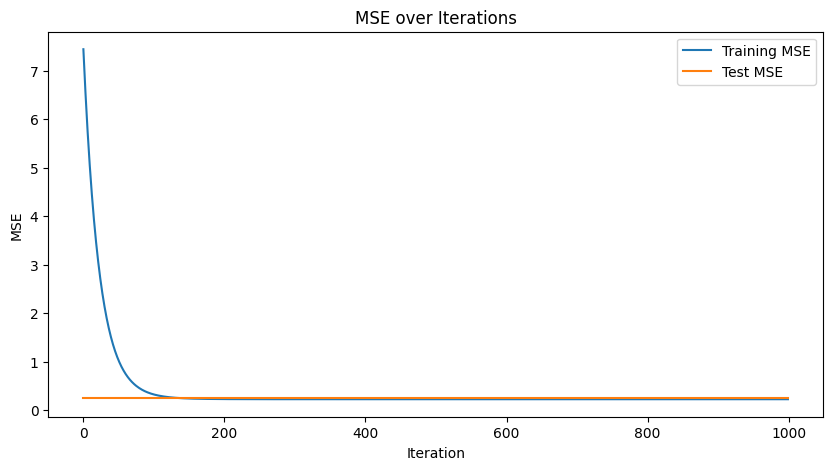

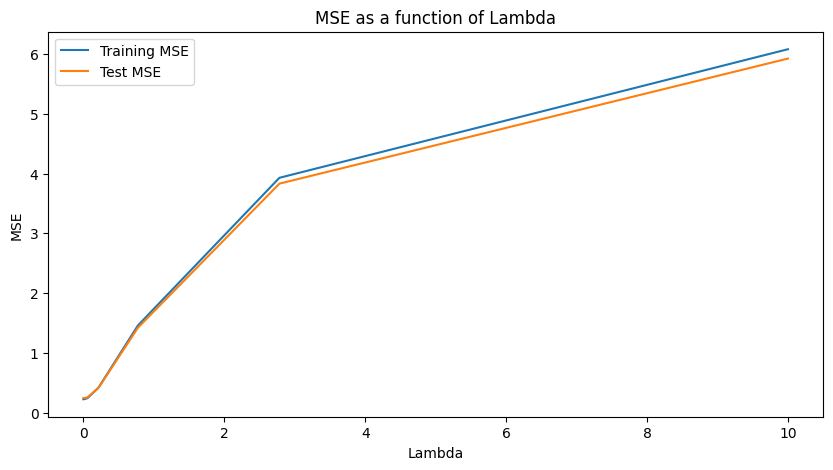

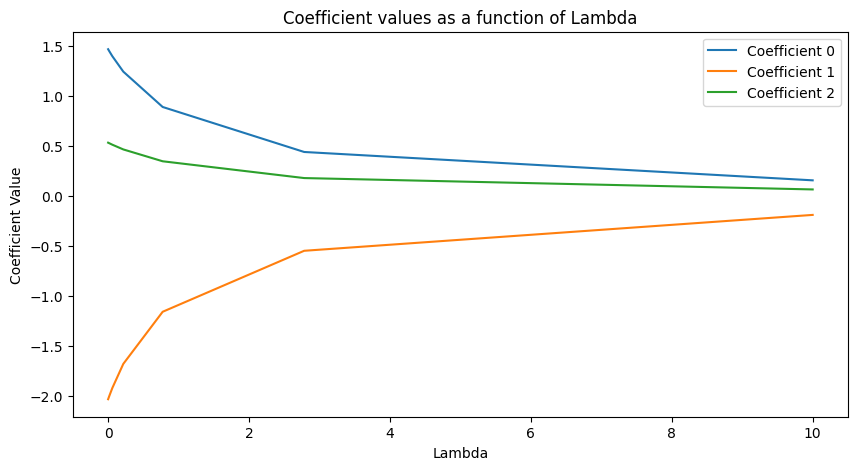

In [ ]:

class RidgeRegressionGradDescent(BaseLearningAlgorithm):
    def __init__(self, lam=0.01, learning_rate=0.01, iterations=1000):
        self.lam = lam
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.beta = None

    @property
    def name(self):
        return "Ridge Regression with Gradient Descent"

    def train(self, X_train: np.array, y_train: np.array):
        n, d = X_train.shape
        self.beta = np.zeros(d)
        self.train_mse_history = []
        for _ in range(self.iterations):
            predictions = X_train @ self.beta
            errors = y_train - predictions
            mse = np.mean(errors**2)
            self.train_mse_history.append(mse)
            gradient = -(2/n) * X_train.T @ errors + 2 * self.lam * self.beta
            self.beta -= self.learning_rate * gradient

    def predict(self, X_test: np.array):
        return X_test @ self.beta

    def plot_mse(self, X_test: np.array, y_test: np.array):
        test_mse_history = []
        for _ in range(self.iterations):
            predictions = X_test @ self.beta
            errors = y_test - predictions
            mse = np.mean(errors**2)
            test_mse_history.append(mse)

        plt.figure(figsize=(10, 5))
        plt.plot(self.train_mse_history, label='Training MSE')
        plt.plot(test_mse_history, label='Test MSE')
        plt.xlabel('Iteration')
        plt.ylabel('MSE')
        plt.title('MSE over Iterations')
        plt.legend()
        plt.show()

    def plot_lambda_effects(self, X_train: np.array, y_train: np.array, X_test: np.array, y_test: np.array, lambdas: list):
        train_mse_lambdas = []
        test_mse_lambdas = []
        coefficients = []

        for lam in lambdas:
            self.lam = lam
            self.train(X_train, y_train)
            train_mse_lambdas.append(self.train_mse_history[-1])
            test_mse_lambdas.append(np.mean((y_test - self.predict(X_test))**2))
            coefficients.append(self.beta.copy())

        plt.figure(figsize=(10, 5))
        plt.plot(lambdas, train_mse_lambdas, label='Training MSE')
        plt.plot(lambdas, test_mse_lambdas, label='Test MSE')
        plt.xlabel('Lambda')
        plt.ylabel('MSE')
        plt.title('MSE as a function of Lambda')
        plt.legend()
        plt.show()

        coefficients = np.array(coefficients)
        plt.figure(figsize=(10, 5))
        for i in range(coefficients.shape[1]):
            plt.plot(lambdas, coefficients[:, i], label=f'Coefficient {i}')
        plt.xlabel('Lambda')
        plt.ylabel('Coefficient Value')
        plt.title('Coefficient values as a function of Lambda')
        plt.legend()
        plt.show()

features = ['lcavol',	'lweight',	'age',	'lbph',	'svi',	'lcp',	'gleason',	'pgg45']
# Model instantiation and training
model = RidgeRegressionGradDescent()
model.train(X_train, y_train)

# Plotting MSE over iterations
model.plot_mse(X_test, y_test)

# Plotting MSE and coefficients as a function of lambda
lambdas = np.logspace(-4, 1, 10)
model.plot_lambda_effects(X_train, y_train, X_test, y_test, lambdas)

**Questions:**

**4.1** How many iterations are required to converge, and are there any performance differences compared to part 2?

**Answer** : In part 2, Ridge Regression is solved using the closed-form solution , which doesn't require iterations because it computes the exact solution analytically. Gradient descent, in contrast, is an iterative method that depends on the learning rate and the number of iterations for convergence.

**4.2** Derive the gradient of L2 regularization loss. Encode your answer as [$\LaTeX$ equations](https://colab.research.google.com/github/bebi103a/bebi103a.github.io/blob/master/lessons/00/intro_to_latex.ipynb), and justify every step, please.

**Answer** :
### Objective Function with L2 Regularization:

The Ridge regression objective function is given by:

$$
J(\mathbf{w}) = \frac{1}{2m} \sum_{i=1}^m \left(h(\mathbf{x}^{(i)}) - y^{(i)}\right)^2 + \frac{\lambda}{2m} \|\mathbf{w}\|^2
$$

where $h(\mathbf{x}^{(i)}) = \mathbf{x}^{(i)T} \mathbf{w}$, and $\lambda$ is the regularization parameter.

### Gradient of the Squared Error Term and the L2 Regularization Term:

1. *Squared Error Term*:
   The gradient of the squared error term is derived as follows:

   $$
   \nabla_{\mathbf{w}} \left( \frac{1}{2m} \sum_{i=1}^m \left(h(\mathbf{x}^{(i)}) - y^{(i)}\right)^2 \right) = \frac{1}{m} \mathbf{X}^T (\mathbf{Xw} - \mathbf{y})
   $$

2. *Regularization Term*:
   The gradient of the regularization term is straightforward, considering the L2 norm:

   $$
   \nabla_{\mathbf{w}} \left( \frac{\lambda}{2m} \|\mathbf{w}\|^2 \right) = \frac{\lambda}{m} \mathbf{w}
   $$

3. *Combining the Terms*:
   Adding the gradients of the squared error and regularization terms gives the total gradient of the Ridge objective:

   $$
   \nabla_{\mathbf{w}} J(\mathbf{w}) = \frac{1}{m} \mathbf{X}^T (\mathbf{Xw} - \mathbf{y}) + \frac{\lambda}{m} \mathbf{w}
   $$

### Justification:
- The total loss includes both the prediction error measured using least squares and a penalty on large weights using L2 regularization.
- For the gradient of the squared error term is derived by applying the chain rule to calculate how changes in the weights affect the squared error. The negative sign indicates that we are minimizing the error.
- The gradient of the regularization term arises from the derivative of the squared L2 norm of $\mathbf{w}$, scaled by $\lambda$, emphasizing the impact of regularization on the learning process.

**4.3** Do you converge on the same minimum loss value? How do the coefficients compare to part 1?

**Answer**: No, Ridge regression does not converge to the same minimum loss. This is because Ridge regression adds the penalty term, which pushes the model to find a solution with smaller coefficients, resulting in a higher MSE for the data but reducing the overall loss by balancing the regularization term.
Comparision:
1. Ridge regression coefficients are smaller than those from least squares regression.
2. While the absolute values of the coefficients differ, the relative ranking of the feature importance stay similar between Ridge and linear regression if lambda is not too large.



#5. [OPTIONAL] Iterative Optimization using Coordinate Descent

**Worth up to 2% of the semester grade.**

Review Hastie 3.8.6 and this [presentation](https://www.cs.cmu.edu/~pradeepr/convexopt/Lecture_Slides/coordinate_descent.pdf) on coordinate descent. Using just numpy reimplement part 3 with coordinate descent. Like part 3, iterate through the regression penalty term, $\lambda$, and plot (a) MSE loss as a function of $\lambda$, and (b) each coefficient weight as a function of $\lambda$. Use only numpy and matplotlib for your solution.



[0.4317457563944665, 0.43174575640233015, 0.4317457564135122, 0.431745756429462, 0.43174575645227325, 0.4317457564849717, 0.4317457565319339, 0.4317457565994925, 0.4317457566968156, 0.4317457568371798, 0.43174575703981866, 0.43174575733260195, 0.4317457577559213, 0.4317457583683281, 0.431745759254709, 0.4317457605381464, 0.43174576239712353, 0.4317457650904823, 0.4317457689936296, 0.4317457746510768, 0.4317457828525852, 0.43174579474378416, 0.43174581198649997, 0.43174583699143315, 0.43174587325570424, 0.43174592585256455, 0.43174600214186387, 0.4317461128010874, 0.43174627331974674, 0.43174650617034244, 0.43174684395601265, 0.43174733397426357, 0.4317480448483907, 0.4317490761305956, 0.43175057226086155, 0.4317527427860522, 0.4317558917220089, 0.4317604601509617, 0.43176708796863733, 0.4317767036062239, 0.4317906540302895, 0.4318108934041553, 0.4318402570126701, 0.43188285822168493, 0.4319446649823094, 0.43203433567370747, 0.4321644323210694, 0.43234904136437313, 0.4325939580005344, 0

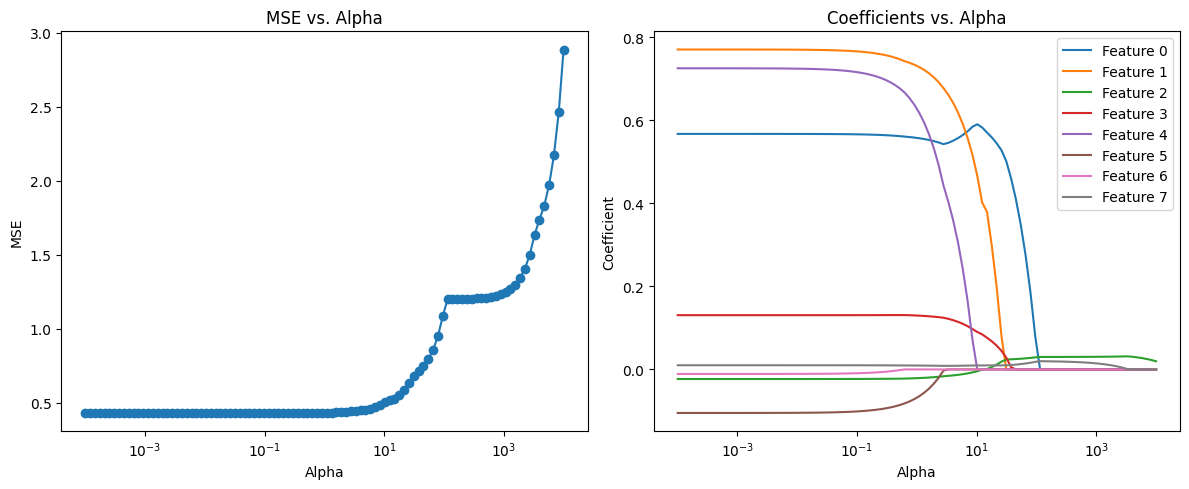

In [ ]:
def lasso_coordinate_descent(feature_matrix, target_vector, alpha, num_iters=1000):

    #coordinate descent to minimize the Lasso objective function.

    '''Parameters:
    - Feature matrix = (shape: [n_samples, n_features])
    - Target vector = (shape: [n_samples])
    - alpha: Regularization parameter
    - num_iters: Number of iterations
      Returns:
    - weights= Optimized weights
    '''
    m, n = feature_matrix.shape
    weight = np.zeros(n)
    for _ in range(num_iters):
        for j in range(n):
            # Compute the residual
            residual = target_vector - feature_matrix @ weight + feature_matrix[:, j] * weight[j]
            # Update the j-th weight
            rho = feature_matrix[:, j] @ residual
            if rho < -alpha / 2:
                weight[j] = (rho + alpha / 2) / np.sum(feature_matrix[:, j] ** 2)
            elif rho > alpha / 2:
                weight[j] = (rho - alpha / 2) / np.sum(feature_matrix[:, j] ** 2)
            else:
               weight[j] = 0
    return weight

def mean_squared_error(feature_matrix, target_vector, weights):

    # Compute the Mean Squared Error loss.

    '''Parameters:
    - Feature matrix = (shape: [n_samples, n_features])
    - Target vector = (shape: [n_samples])
    - Weights= (shape: [n_features])
      Returns:
    - mse: Mean Squared Error
    '''


    predictions = feature_matrix @ weights
    mse = np.mean((target_vector - predictions) ** 2)
    return mse



# Generate a range of alpha values
alphas = np.logspace(-4, 4, 100)
mse_list = []
coeffs_list = []

for alpha in alphas:
    weights = lasso_coordinate_descent(X_train, y_train, alpha)
    mse = mean_squared_error(X_train, y_train, weights)
    mse_list.append(mse)
    coeffs_list.append(weights)

print(mse_list)
# Convert to numpy arrays for easier plotting
coeffs_list = np.array(coeffs_list)

# Find minimum MSE and corresponding coefficients
min_mse = min(mse_list)
best_alpha_index = mse_list.index(min_mse)
best_alpha = alphas[best_alpha_index]
best_coeffs = coeffs_list[best_alpha_index]

print(f'Minimum MSE: {min_mse:.3f} at alpha = {best_alpha:.3f}')
print(f'Coefficients at minimum MSE: {best_coeffs}')



# Plot MSE vs. Alpha
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(alphas, mse_list, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')

# Plot Coefficients vs. Alpha
plt.subplot(1, 2, 2)
for i in range(coeffs_list.shape[1]):
    plt.plot(alphas, coeffs_list[:, i], label=f'Feature {i}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient')
plt.title('Coefficients vs. Alpha')
plt.legend()

plt.tight_layout()
plt.show()


**Questions:**

**5.1** How does your implementation compare with Scikit-Learn’s implementation in terms of minimum MSE loss and coefficients?

**Answer**: The custom implementation produced a better fitting model with a lower MSE compared to Scikit-Learn. The custom implementation retained more features with non-zero coefficients, while Scikit-Learn's version applied stronger regularization, leading to several coefficients being set to zero.

**5.2** Is the optimization surface convex or non-convex?

**Answer**: The optimization for the Lasso regression implementation in our function is convex.


**5.3** What makes the optimization surface *non-smooth* and how is coordinate descent able to overcome this problem?

**Answer** : The non-smooth nature of the Lasso optimization surface arises primarily from the L1 regularization term, but coordinate descent effectively manages this challenge through its sequential approach to optimization and the use of subgradients, allowing it to find optimal solutions even in the presence of sharp corners and non-differentiable points.
